# FRUIT CLASSIFIER 

SUMMARY --

*   PERFORMED PREPROCESSING AND VISUALIZATION OF IMAGES

*   DATA AUGMENTATION 
*   MY OWN MODEL USING CONVOLUTIONAL NEURAL NETS(CNN)  ---  95% TEST ACCURACY
*   TRANSFER LEARNING USING VGG16 , VGG19 , NASNET , DENSENET, RESNET50 , INCEPTIONV3
*   FINE TUNING USING VGG16  ---  92% TEST ACCURACY

### IMPORTING LIBRARIES

In [3]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers,activations
from keras.preprocessing import image
from keras.applications import vgg19, densenet, nasnet
from keras.applications import vgg16, inception_v3, resnet50
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model


% matplotlib inline

#### SET TRAIN  AND TEST PATH

In [2]:
train_path = '.../fruit classification images(fruit 360 dataset)/fruits-360/Training'
test_path= '.../fruit classification images(fruit 360 dataset)/fruits-360/Test'

###### LISTING THE FOLDERS IN TRAIN AND TEST PATH

In [73]:
os.listdir(train_path)

['Kiwi',
 'Grape White',
 'Apple Braeburn',
 'Watermelon',
 'Banana',
 'Ginger Root',
 'Pepper Green',
 'Tangelo',
 'Chestnut',
 'Redcurrant',
 'Mandarine',
 'Grape Blue',
 'Cucumber Ripe',
 'Grape White 2',
 'Grapefruit Pink',
 'Clementine',
 'Pitahaya Red',
 'Lemon',
 'Potato White',
 'Grape Pink',
 'Kumquats',
 'Tomato Heart',
 'Banana Red',
 'Lychee',
 'Plum 3',
 'Apple Red Yellow 2',
 'Avocado ripe',
 'Apple Red 3',
 'Pear',
 'Plum',
 'Pepper Yellow',
 'Tomato 1',
 'Beetroot',
 'Tomato Maroon',
 'Physalis',
 'Eggplant',
 'Cherry 2',
 'Avocado',
 'Onion Red Peeled',
 'Kohlrabi',
 'Peach Flat',
 'Pomegranate',
 'Cherry Rainier',
 'Tomato 2',
 'Corn',
 'Tamarillo',
 'Salak',
 'Mango',
 'Blueberry',
 'Tomato Cherry Red',
 'Cantaloupe 1',
 'Potato Red',
 'Walnut',
 'Guava',
 'Passion Fruit',
 'Granadilla',
 'Apricot',
 'Nut Pecan',
 'Pear Forelle',
 'Apple Red Yellow 1',
 'Mangostan',
 'Apple Golden 2',
 'Cactus fruit',
 'Cherry 1',
 'Corn Husk',
 'Onion White',
 'Pepper Red',
 'Apple 

In [74]:
os.listdir(test_path)

['Kiwi',
 'Grape White',
 'Apple Braeburn',
 'Watermelon',
 'Banana',
 'Ginger Root',
 'Pepper Green',
 'Tangelo',
 'Chestnut',
 'Redcurrant',
 'Mandarine',
 'Grape Blue',
 'Cucumber Ripe',
 'Grape White 2',
 'Grapefruit Pink',
 'Clementine',
 'Pitahaya Red',
 'Lemon',
 'Potato White',
 'Grape Pink',
 'Kumquats',
 'Tomato Heart',
 'Banana Red',
 'Lychee',
 'Plum 3',
 'Apple Red Yellow 2',
 'Avocado ripe',
 'Apple Red 3',
 'Pear',
 'Plum',
 'Pepper Yellow',
 'Tomato 1',
 'Beetroot',
 'Tomato Maroon',
 'Physalis',
 'Eggplant',
 'Cherry 2',
 'Avocado',
 'Onion Red Peeled',
 'Kohlrabi',
 'Peach Flat',
 'Pomegranate',
 'Cherry Rainier',
 'Tomato 2',
 'Corn',
 'Tamarillo',
 'Salak',
 'Mango',
 'Blueberry',
 'Tomato Cherry Red',
 'Cantaloupe 1',
 'Potato Red',
 'Walnut',
 'Guava',
 'Passion Fruit',
 'Granadilla',
 'Apricot',
 'Nut Pecan',
 'Pear Forelle',
 'Apple Red Yellow 1',
 'Mangostan',
 'Apple Golden 2',
 'Cactus fruit',
 'Cherry 1',
 'Corn Husk',
 'Onion White',
 'Pepper Red',
 'Apple 

In [75]:
print('Number of classes in train set ' + ' -- ' + str(len(os.listdir(train_path))))
print('Number of classes in test set ' + ' -- ' + str(len(os.listdir(test_path))))

Number of classes in train set  -- 131
Number of classes in test set  -- 131


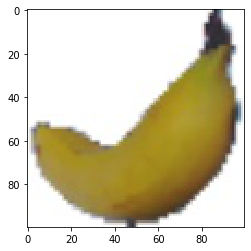

In [4]:
plt.imshow(imread(train_path + '/Banana' + '/2_100.jpg'))

------------------------------------------------------------------------------------------------------------------

* Total number of images: 90483
* Training set size: 67692 images 
* Test set size: 22688 images
* Number of classes: 131 
* Image size: 100x100 pixels

------------------------------------------------------------------------------------------------------------------

### DATA AUGMENTATION

In [6]:
## TRAIN SET IMAGE GENERATOR

image_gen_train = ImageDataGenerator(rotation_range = 10,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1, 
                                     shear_range=0.1, 
                                     zoom_range=0.1,
                                    rescale=1/255,
                                    fill_mode='nearest',
                                    horizontal_flip=True)

train_generator = image_gen_train.flow_from_directory(train_path,
                                    target_size=(100,100),
                                    batch_size=32,
                                    color_mode='rgb',
                                    class_mode='categorical')

In [9]:
## TEST SET IMAGE GENERATOR

image_gen_test = ImageDataGenerator(rescale = 1/255)

test_generator = image_gen_test.flow_from_directory(test_path,
                                    target_size=(100,100),
                                    batch_size=32,
                                    color_mode='rgb',
                                    class_mode='categorical',
                                    shuffle = False)

Found 22688 images belonging to 131 classes.


------------------------------------------------------------------------------------------------------------------

## CREATING OUR OWN MODEL

In [76]:
model = models.Sequential([
    layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
    layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.4),
    layers.Dense(131, activation = 'softmax')
])

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_189 (Conv2D)          (None, 98, 98, 16)        448       
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)              

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])

In [13]:
history = model.fit_generator(train_generator,epochs=5,validation_data=test_generator)


Epoch 1/5
2116/2116 [==============================] - 1143s 540ms/step - loss: 1.6742 - accuracy: 0.5237 - val_loss: 8.0344e-04 - val_accuracy: 0.8884
Epoch 2/5
2116/2116 [==============================] - 983s 465ms/step - loss: 0.5668 - accuracy: 0.8081 - val_loss: 3.5341e-05 - val_accuracy: 0.9297
Epoch 3/5
2116/2116 [==============================] - 1008s 476ms/step - loss: 0.4225 - accuracy: 0.8553 - val_loss: 3.4496e-06 - val_accuracy: 0.9538
Epoch 4/5
2116/2116 [==============================] - 1019s 482ms/step - loss: 0.3651 - accuracy: 0.8743 - val_loss: 4.4703e-08 - val_accuracy: 0.9075
Epoch 5/5
2116/2116 [==============================] - 985s 465ms/step - loss: 0.3125 - accuracy: 0.8923 - val_loss: 6.3628e-06 - val_accuracy: 0.9510


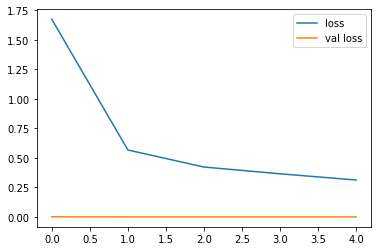

In [17]:
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val loss')
plt.legend()

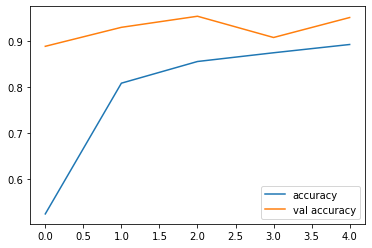

In [18]:
plt.plot(model.history.history['accuracy'],label='accuracy')
plt.plot(model.history.history['val_accuracy'],label='val accuracy')
plt.legend()

------------------------------------------------------------------------------------------------------------------

## EVALUATING OUR MODEL (CONFUSION MATRIX AND CLASSIFICATION REPORT)

### WE HAVE 95% TEST ACCURACY AND 90% TRAIN ACCURACY AFTER 5 EPOCHS ON OUR MODEL

In [20]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

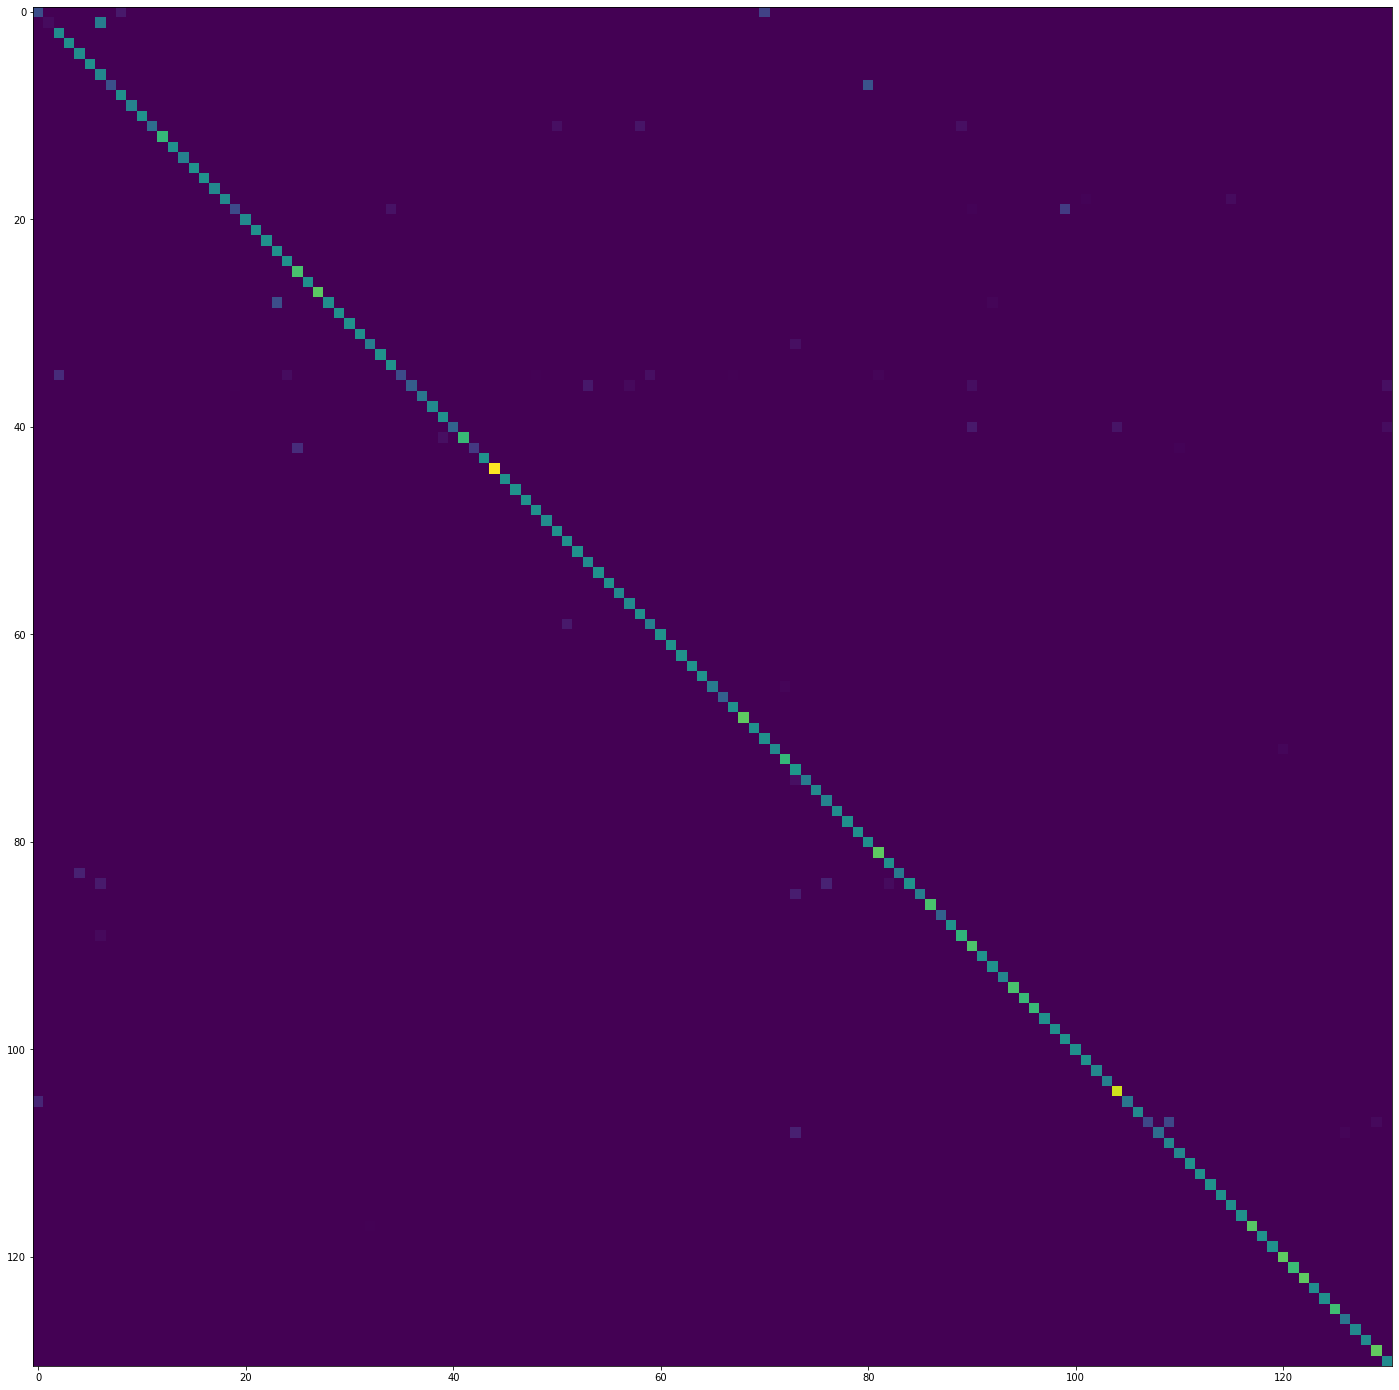

In [33]:
## CONFUSION MATRIX HEATMAP

cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(25,25))
plt.imshow(cm, interpolation='nearest')

In [35]:
## CLASSIFICATION REPORT


class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
target_names = list(class_labels.values())


print(classification_report(test_generator.classes, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

     Apple Braeburn       0.69      0.48      0.56       164
 Apple Crimson Snow       1.00      0.07      0.13       148
     Apple Golden 1       0.80      1.00      0.89       160
     Apple Golden 2       1.00      1.00      1.00       164
     Apple Golden 3       0.84      1.00      0.91       161
 Apple Granny Smith       1.00      1.00      1.00       164
    Apple Pink Lady       0.47      1.00      0.64       152
        Apple Red 1       1.00      0.49      0.66       164
        Apple Red 2       0.88      1.00      0.93       164
        Apple Red 3       1.00      1.00      1.00       144
Apple Red Delicious       1.00      1.00      1.00       166
 Apple Red Yellow 1       1.00      0.71      0.83       164
 Apple Red Yellow 2       1.00      1.00      1.00       219
            Apricot       1.00      1.00      1.00       164
            Avocado       1.00      1.00      1.00       143
       Avocado ripe    

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

## PREDICTING ON CUSTOM IMAGES

In [39]:
## CLASS LABELS 

class_labels

{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apple Golden 1',
 3: 'Apple Golden 2',
 4: 'Apple Golden 3',
 5: 'Apple Granny Smith',
 6: 'Apple Pink Lady',
 7: 'Apple Red 1',
 8: 'Apple Red 2',
 9: 'Apple Red 3',
 10: 'Apple Red Delicious',
 11: 'Apple Red Yellow 1',
 12: 'Apple Red Yellow 2',
 13: 'Apricot',
 14: 'Avocado',
 15: 'Avocado ripe',
 16: 'Banana',
 17: 'Banana Lady Finger',
 18: 'Banana Red',
 19: 'Beetroot',
 20: 'Blueberry',
 21: 'Cactus fruit',
 22: 'Cantaloupe 1',
 23: 'Cantaloupe 2',
 24: 'Carambula',
 25: 'Cauliflower',
 26: 'Cherry 1',
 27: 'Cherry 2',
 28: 'Cherry Rainier',
 29: 'Cherry Wax Black',
 30: 'Cherry Wax Red',
 31: 'Cherry Wax Yellow',
 32: 'Chestnut',
 33: 'Clementine',
 34: 'Cocos',
 35: 'Corn',
 36: 'Corn Husk',
 37: 'Cucumber Ripe',
 38: 'Cucumber Ripe 2',
 39: 'Dates',
 40: 'Eggplant',
 41: 'Fig',
 42: 'Ginger Root',
 43: 'Granadilla',
 44: 'Grape Blue',
 45: 'Grape Pink',
 46: 'Grape White',
 47: 'Grape White 2',
 48: 'Grape White 3',
 49: '

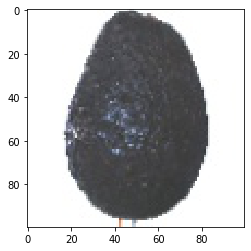

In [5]:
## THIS IS AVOCADO RIPE (CLASS LABEL : 15). WE WILL USE THIS FOR TESTING OUR MODEL

new_image_pil = image.load_img('.../fruit classification images(fruit 360 dataset)/fruits-360/Test/Avocado ripe/161_100.jpg',target_size=(100,100,3))
plt.imshow(new_image_pil)

In [7]:
new_image_array = image.img_to_array(new_image_pil)
new_image_scaled = new_image_array * 1./255
new_image = np.expand_dims(new_image_scaled, axis=0)
new_image.shape

(1, 100, 100, 3)

In [50]:
classes = model.predict_classes(new_image)

In [51]:
classes

array([15])

###### WE CAN SEE ABOVE OUR MODEL HAS PREDICTED CLASS 15 THAT IS RIPE AVOCADO WHICH WAS CORRECT PREDICTION

In [53]:
## SAVING OUR MODEL

model.save('fruit classifier model(fruit360).h5')

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

## TRANSFER LEARNING AND FINE TUNING

### USED VARIOUS MODELS LIKE VGG16 , VGG19 , NASNET , DENSENET, RESNET50 , INCEPTIONV3 FOR TRANFER LEARNING AND USED VGG16 FOR FINE TUNING

### 1) PERFORMED TRANSFER LEARNING ON ALL MODELS

### 2) USED VGG16 BY FREEZING CONV LAYERS AND TRAINING FC LAYERS(FINE TUNING)

------------------------------------------------------------------------------------------------------------------

#### LOADING ALL MODELS FIRST AND THEIR SUMMARIES

In [ ]:
#Loads the VGG16 model
vgg16_model = vgg16.VGG16(weights='imagenet')

#Loads the VGG19 model
vgg19_model = vgg19.VGG19(weights='imagenet')

# Loads the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')

# Loads the ResNet50 model 
resnet_model = resnet50.ResNet50(weights='imagenet')

#Loads the NASNET LARGE model
nasnet_model = nasnet.NASNetLarge(weights='imagenet')

#Loads the DENSENET201 model
densenet_model = densenet.DenseNet201(weights='imagenet')

In [19]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [21]:
inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_404 (Activation)     (None, 149, 149, 32) 0           batch_normalization_95[0][0]     
_______________________________________________________________________________________

In [22]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [23]:
nasnet_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_4[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_144 (Activation)     (None, 165, 165, 96) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

separable_conv_1_normal_left1_4 (None, 42, 42, 168)  32424       activation_215[0][0]             
__________________________________________________________________________________________________
separable_conv_1_normal_right1_ (None, 42, 42, 168)  29736       activation_217[0][0]             
__________________________________________________________________________________________________
separable_conv_1_normal_left2_4 (None, 42, 42, 168)  32424       activation_219[0][0]             
__________________________________________________________________________________________________
separable_conv_1_normal_right2_ (None, 42, 42, 168)  29736       activation_221[0][0]             
__________________________________________________________________________________________________
separable_conv_1_normal_left5_4 (None, 42, 42, 168)  29736       activation_223[0][0]             
__________________________________________________________________________________________________
separable_

In [24]:
densenet_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_5 (ZeroPadding2D (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_5[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

__________________________________________________________________________________________________
conv4_block19_0_bn (BatchNormal (None, 14, 14, 832)  3328        conv4_block18_concat[0][0]       
__________________________________________________________________________________________________
conv4_block19_0_relu (Activatio (None, 14, 14, 832)  0           conv4_block19_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_block19_1_conv (Conv2D)   (None, 14, 14, 128)  106496      conv4_block19_0_relu[0][0]       
__________________________________________________________________________________________________
conv4_block19_1_bn (BatchNormal (None, 14, 14, 128)  512         conv4_block19_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block19_1_relu (Activatio (None, 14, 14, 128)  0           conv4_block19_1_bn[0][0]         
__________

------------------------------------------------------------------------------------------------------------------

### TRANSFER LEARNING (USING CUSTOM IMAGE AND DIRECTLY PREDICTING ON ALL THE ABOVE MODELS WITHOUT TRAINING THEM)

In [31]:
## PREDICTING ON VGG16

img_path = '.../fruit classification images(fruit 360 dataset)/fruits-360/Test/Watermelon/274_100.jpg'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)

preds = vgg16_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', vgg16.decode_predictions(preds, top=5)[0])

Predicted: [('n04409515', 'tennis_ball', 0.16719061), ('n04192698', 'shield', 0.13502501), ('n03447721', 'gong', 0.111101486), ('n07760859', 'custard_apple', 0.06827442), ('n03720891', 'maraca', 0.047244437)]


In [32]:
## PREDICTING ON VGG19

img_path = '.../fruit classification images(fruit 360 dataset)/fruits-360/Test/Watermelon/274_100.jpg'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg19.preprocess_input(x)

preds = vgg19_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', vgg19.decode_predictions(preds, top=5)[0])

Predicted: [('n07760859', 'custard_apple', 0.9420862), ('n07717410', 'acorn_squash', 0.0282602), ('n01667114', 'mud_turtle', 0.0050986353), ('n07716906', 'spaghetti_squash', 0.0028506126), ('n07714571', 'head_cabbage', 0.0027391834)]


In [33]:
## PREDICTING ON RESNET50

img_path = '.../fruit classification images(fruit 360 dataset)/fruits-360/Test//Watermelon/274_100.jpg'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = resnet50.preprocess_input(x)

preds = resnet_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', resnet50.decode_predictions(preds, top=5)[0])

Predicted: [('n07760859', 'custard_apple', 0.86468977), ('n07716906', 'spaghetti_squash', 0.020879554), ('n07753113', 'fig', 0.008696629), ('n07717410', 'acorn_squash', 0.0077960985), ('n07718747', 'artichoke', 0.007619843)]


In [34]:
## PREDICTING ON INCEPTION_V3

img_path = '.../fruit classification images(fruit 360 dataset)/fruits-360/Test/Watermelon/274_100.jpg'

img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = inception_v3.preprocess_input(x)

preds = inception_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', inception_v3.decode_predictions(preds, top=5)[0])

Predicted: [('n07716906', 'spaghetti_squash', 0.7159467), ('n07717410', 'acorn_squash', 0.034600157), ('n07717556', 'butternut_squash', 0.026076999), ('n07749582', 'lemon', 0.008261036), ('n03720891', 'maraca', 0.0055324147)]


In [35]:
## PREDICTING ON NASNET

img_path = '.../fruit classification images(fruit 360 dataset)/fruits-360/Test/Watermelon/274_100.jpg'

img = image.load_img(img_path, target_size=(331, 331))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = nasnet.preprocess_input(x)

preds = nasnet_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', nasnet.decode_predictions(preds, top=5)[0])

Predicted: [('n07716906', 'spaghetti_squash', 0.8046855), ('n07717410', 'acorn_squash', 0.083928235), ('n07760859', 'custard_apple', 0.018396191), ('n07717556', 'butternut_squash', 0.009114277), ('n07742313', 'Granny_Smith', 0.0038901134)]


In [36]:
## PREDICTING ON DENSENET201

img_path = '.../fruit classification images(fruit 360 dataset)/fruits-360/Test/Watermelon/274_100.jpg'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = densenet.preprocess_input(x)

preds = densenet_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', densenet.decode_predictions(preds, top=5)[0])

Predicted: [('n07717410', 'acorn_squash', 0.98165846), ('n07716906', 'spaghetti_squash', 0.013460012), ('n03447721', 'gong', 0.0023849953), ('n03590841', "jack-o'-lantern", 0.0005837764), ('n07717556', 'butternut_squash', 0.00045753104)]


------------------------------------------------------------------------------------------------------------------

## FINE TUNING (VGG16)

### ALL THE CONVOLUTIONAL LAYERS HAVE BEEN FREEZED AND NEW FC LAYERS ARE CONNECTED AND I HAVE TRAINED THE MODEL ON OUR DATASET.

In [59]:
from keras.applications import VGG16

img_rows = 100
img_cols = 100 

#Loading the VGG16 model without the FC layers
vgg16 = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))


# All our layers 
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D True
2 Conv2D True
3 MaxPooling2D True
4 Conv2D True
5 Conv2D True
6 MaxPooling2D True
7 Conv2D True
8 Conv2D True
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True


In [ ]:
# freezing the layers 
for layer in vgg16.layers:
    layer.trainable = False

In [63]:
## function that returns our FC Head

def addTopModel(bottom_model, num_classes, D=256):
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [68]:
## Adding FC Head back onto VGG

num_classes = 131

FC_Head = addTopModel(vgg16, num_classes)

model_tl3 = Model(inputs=vgg16.input, outputs=FC_Head)

print(model_tl3.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [65]:
## TRAIN AND TEST GENERATOR 

image_gen_train_tl = ImageDataGenerator(rescale=1/255,
                                    fill_mode='nearest',
                                    horizontal_flip=True)

train_generator_tl = image_gen_train.flow_from_directory(train_path,
                                    target_size=(img_rows, img_cols),
                                    batch_size=32,
                                    color_mode='rgb',
                                    class_mode='categorical')

image_gen_test_tl = ImageDataGenerator(rescale = 1/255)

test_generator_tl = image_gen_test.flow_from_directory(test_path,
                                    target_size=(img_rows, img_cols),
                                    batch_size=32,
                                    color_mode='rgb',
                                    class_mode='categorical',
                                    shuffle = False)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [69]:
## Training our top layers

model_tl3.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [70]:
model_tl3.fit_generator(train_generator_tl, epochs=2)

Epoch 1/2
2116/2116 [==============================] - 5076s 2s/step - loss: 1.1480 - accuracy: 0.7040
Epoch 2/2
2116/2116 [==============================] - 5073s 2s/step - loss: 0.2909 - accuracy: 0.9086


In [71]:
model_tl3.save('model_tl3.h5')

In [72]:
model_tl3.evaluate_generator(test_generator_tl)

[0.006782155483961105, 0.9266572594642639]

## WITH JUST 2 EPOCHS ON OUR FINE TUNED MODEL USING VGG16 WE HAVE OBTAINED 92% TEST ACCURACY AND 90% TRAIN ACCURACY !!